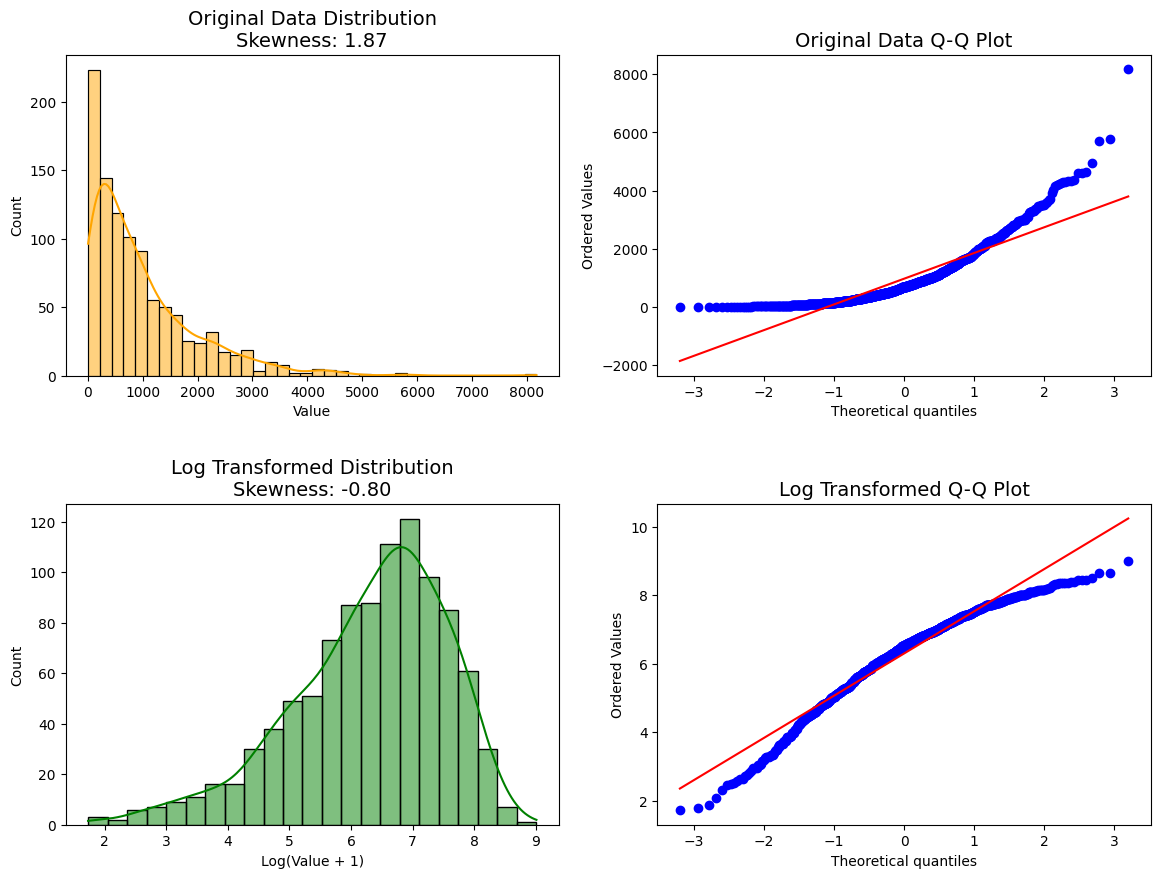

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. 가상의 치우친 데이터 생성 (예: 매출액, 소득 등)
np.random.seed(42)
# 지수 분포(Exponential Distribution)를 사용하여 오른쪽으로 긴 꼬리 데이터 생성
original_data = np.random.exponential(scale=1000, size=1000)

# 2. 로그 변환 적용
# np.log() 대신 np.log1p() 사용 -> log(1+x)
# 데이터에 0이 포함되어 있어도 -inf가 나오지 않게 안전하게 변환
log_transformed_data = np.log1p(original_data)

# 3. 왜도(Skewness) 비교 계산
skew_original = stats.skew(original_data)
skew_log = stats.skew(log_transformed_data)

# 4. 시각화 (히스토그램 & Q-Q Plot)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.4)

# --- 변환 전 (Original) ---
# 히스토그램
sns.histplot(original_data, kde=True, ax=axes[0, 0], color='orange')
axes[0, 0].set_title(f'Original Data Distribution\nSkewness: {skew_original:.2f}', fontsize=14)
axes[0, 0].set_xlabel('Value')

# Q-Q Plot (정규성 확인)
stats.probplot(original_data, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Original Data Q-Q Plot', fontsize=14)

# --- 변환 후 (Log Transformed) ---
# 히스토그램
sns.histplot(log_transformed_data, kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title(f'Log Transformed Distribution\nSkewness: {skew_log:.2f}', fontsize=14)
axes[1, 0].set_xlabel('Log(Value + 1)')

# Q-Q Plot (정규성 확인)
stats.probplot(log_transformed_data, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Log Transformed Q-Q Plot', fontsize=14)

plt.show()